# Задание 1 - Загрузить файл 'auto.csv'

import csv
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
from scipy.stats import kurtosis, skew
%matplotlib inline


In [19]:
pd.read_csv('auto.csv', delimiter = ',').head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Задание 2 - Основные статистики

In [20]:
data = pd.read_csv('auto.csv', delimiter = ',')

In [15]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Задание 3 - Корреляционная матрица

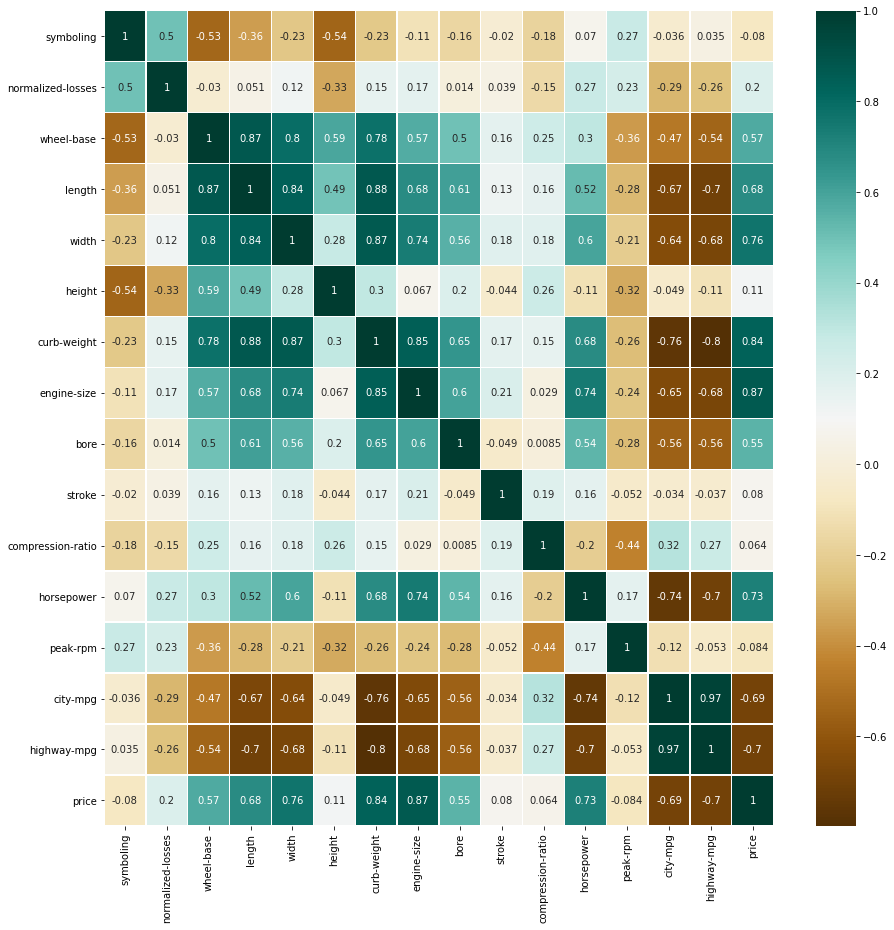

In [28]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap=plt.cm.BrBG,linewidths=0.3) #data.corr()-->матрица корреляций
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

# Задание 4 - Распределение переменной 'price'

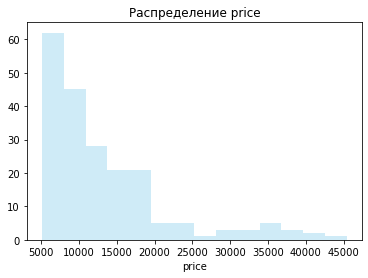

In [36]:
ax= sns.distplot(data['price'], 
                 kde=False,
                 color="skyblue")
plt.title("Распределение price")
plt.show()

In [40]:
print('kurtosis: ',format(kurtosis(data['price'])))
print('skewness: ',format(skew(data['price'])))

kurtosis:  2.848082544390688
skewness:  1.7534486514523662


# Задание 5 - Визуализация взаимосвязей

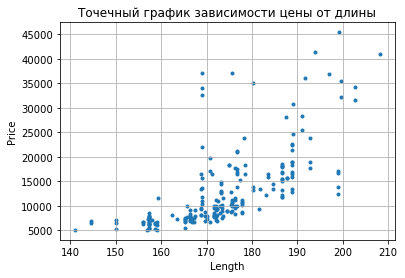

In [44]:
price = data['price']
length = data['length']
plt.xlabel('Length')
plt.ylabel('Price')
plt.title('Точечный график зависимости цены от длины')
plt.grid(True)
plt.scatter(length, price, marker='.')

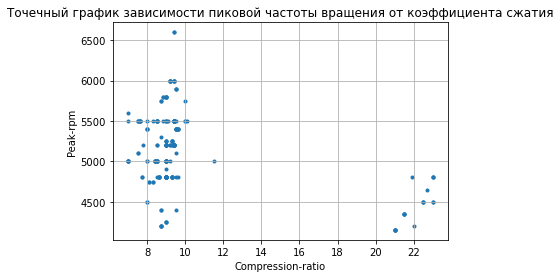

In [46]:
compression = data['compression-ratio']
peak = data['peak-rpm']
plt.xlabel('Compression-ratio')
plt.ylabel('Peak-rpm')
plt.title('Точечный график зависимости пиковой частоты вращения от коэффициента сжатия')
plt.grid(True)
plt.scatter(compression, peak, marker='.')

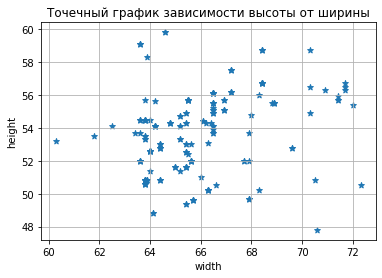

In [48]:
width = data['width']
height = data['height']
plt.xlabel('width')
plt.ylabel('height')
plt.title('Точечный график зависимости высоты от ширины')
plt.grid(True)
plt.scatter(width, height, marker='*')

# Задание 6 - Гипотезы 

Гипотеза: Цена не зависит от подсоса(привода) авто

In [49]:
data1 = data[data['aspiration']=='std']['price']
data2 = data[data['aspiration']=='turbo']['price']
print(stats.ttest_ind(data1, data2))

Ttest_indResult(statistic=-2.648853921594821, pvalue=0.008711812005312373)


pvalue < 0.05 , следовательно гипотеза верна

C:\Users\Ishmuratov\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

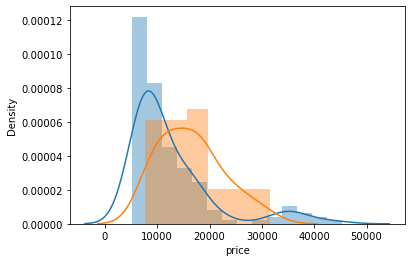

In [50]:
sns.distplot(data1)
sns.distplot(data2)

2) Гипотеза: Карбюратор (система впрыска топлива) не зависит от массы авто

Ttest_indResult(statistic=12.315164445603802, pvalue=7.375110887754921e-25)


C:\Users\Ishmuratov\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='curb-weight', ylabel='Density'>

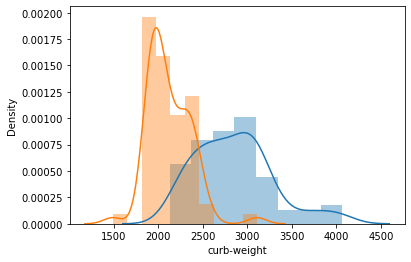

In [52]:
data1 = data[data['fuel-system']=='mpfi']['curb-weight']
data2 = data[data['fuel-system']=='2bbl']['curb-weight']
print(stats.ttest_ind(data1, data2))
sns.distplot(data1)
sns.distplot(data2)

pvalue < 0.05 , следовательно гипотеза верна

3) Гипотеза: Цена автомобиля зависит от марки

Ttest_indResult(statistic=7.066087687138787, pvalue=5.629140322970372e-06)


C:\Users\Ishmuratov\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ishmuratov\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

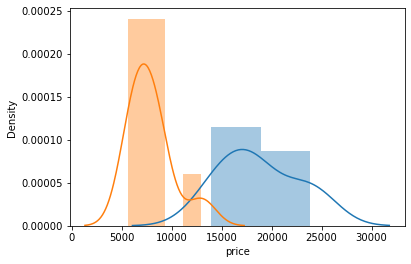

In [53]:
data1 = data[data['make']=='audi']['price']
data2 = data[data['make']=='dodge']['price']
print(stats.ttest_ind(data1, data2))
sns.distplot(data1)
sns.distplot(data2)

pvalue < 0.05 , следовательно гипотеза верна